In [1]:
import pandas as pd
import numpy as np
import joblib

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\adult.data.csv")


In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.shape

(48842, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [10]:
print(df.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [11]:
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']

In [12]:
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [13]:
# Drop missing or irrelevant values
df = df.replace('?', np.nan)
df = df.dropna()

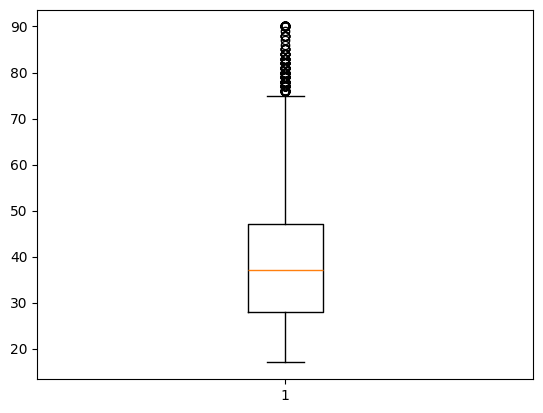

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(df['age'])
plt.show()

In [15]:
df=df[(df['age']<=75)&(df['age']>=17)]

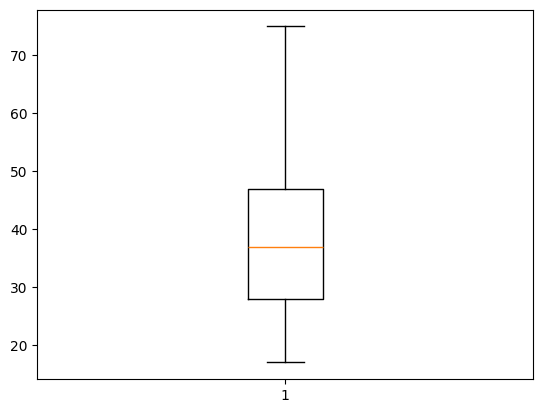

In [16]:
plt.boxplot(df['age'])
plt.show()

In [17]:
df.shape

(44932, 15)

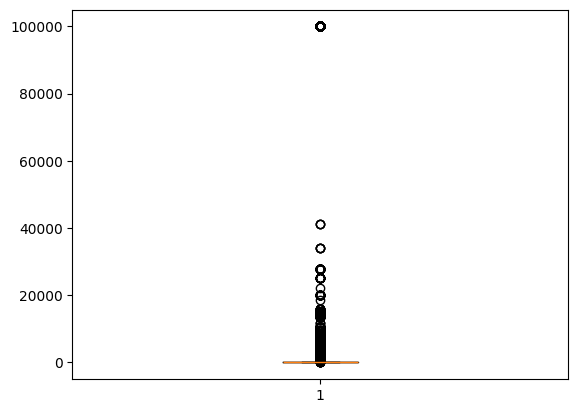

In [18]:
plt.boxplot(df['capital-gain'])
plt.show()

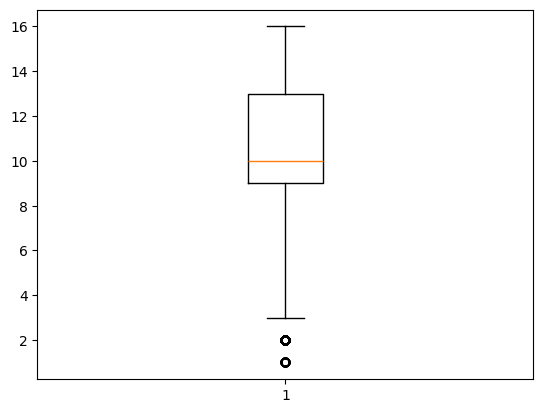

In [19]:
plt.boxplot(df['educational-num'])
plt.show()

In [20]:
df=df[(df['educational-num']<=16)&(df['educational-num']>=5)]

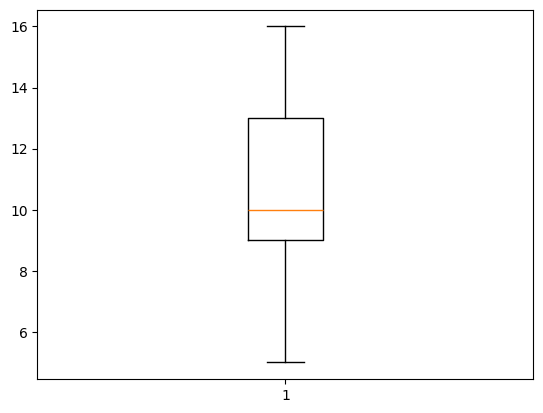

In [21]:
plt.boxplot(df['educational-num'])
plt.show()

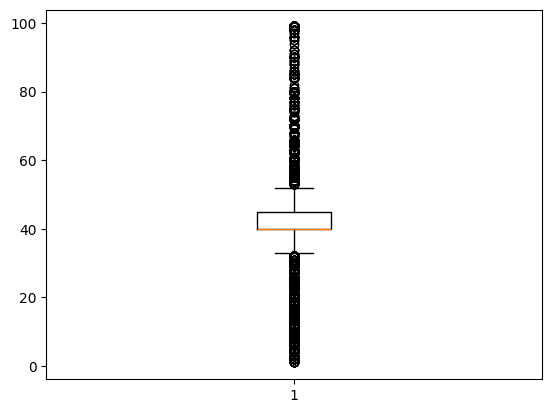

In [22]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [23]:
# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [24]:
# Features and target
X = df.drop("income", axis=1)  # Update "salary" if your target column name is different
y = df["income"]

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")



Model Accuracy: 86.76%


In [28]:
# Save model and encoders
joblib.dump(model, "salary_model_xgb.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [29]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("salary_model_xgb.pkl")
label_encoders = joblib.load("label_encoders.pkl")

st.title("Employee Salary Prediction App")

def user_input():
    age = st.number_input("Age", 18, 100)
    workclass = st.selectbox("Workclass", label_encoders["workclass"].classes_)
    education = st.selectbox("Education", label_encoders["education"].classes_)
    occupation = st.selectbox("Occupation", label_encoders["occupation"].classes_)
    marital_status = st.selectbox("Marital Status", label_encoders["marital-status"].classes_)
    relationship = st.selectbox("Relationship", label_encoders["relationship"].classes_)
    race = st.selectbox("Race", label_encoders["race"].classes_)
    gender = st.selectbox("gender", label_encoders["gender"].classes_)
    hours_per_week = st.slider("Hours per Week", 1, 100, 40)
    native_country = st.selectbox("Native Country", label_encoders["native-country"].classes_)
    fnlwgt = st.number_input("Final Weight (fnlwgt)", min_value=0, value=100000)
    educational_num = st.number_input("Educational Num", min_value=1, value=10)
    capital_gain = st.number_input("Capital Gain", min_value=0, value=0)
    capital_loss = st.number_input("Capital Loss", min_value=0, value=0)
    data = {
    "age": age,
    "workclass": label_encoders["workclass"].transform([workclass])[0],
    "fnlwgt": fnlwgt,
    "education": label_encoders["education"].transform([education])[0],
    "educational-num": educational_num,
    "marital-status": label_encoders["marital-status"].transform([marital_status])[0],
    "occupation": label_encoders["occupation"].transform([occupation])[0],
    "relationship": label_encoders["relationship"].transform([relationship])[0],
    "race": label_encoders["race"].transform([race])[0],
    "gender": label_encoders["gender"].transform([gender])[0],
    "capital-gain": capital_gain,
    "capital-loss": capital_loss,
    "hours-per-week": hours_per_week,
    "native-country": label_encoders["native-country"].transform([native_country])[0]
}

    return pd.DataFrame([data])

input_df = user_input()

if st.button("Predict Salary"):
    prediction = model.predict(input_df)[0]
    if prediction == 1:
        st.success("Prediction: Salary > 50K")
    else:
        st.success("Prediction: Salary ≤ 50K")


Overwriting app.py
